# Depth Anything 3 (DA3) Usage Example

This notebook demonstrates how to use Depth Anything 3 for camera poses and depth estimation.


In [ ]:
# Install required packages
# !pip install depth-anything-3

In [2]:
!uv pip install addict 

Using Python 3.10.19 environment at: C:\Users\jordan\miniconda3\envs\coralnet10
Resolved 1 package in 36ms
Prepared 1 package in 10ms
Installed 1 package in 6ms
 + addict==2.4.0


In [3]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch


from depth_anything_3.api import DepthAnything3
from depth_anything_3.utils.visualize import visualize_depth

[WARN ] Dependency `gsplat` is required for rendering 3DGS. Install via: pip install git+https://github.com/nerfstudio-project/gsplat.git@0b4dddf04cb687367602c01196913cde6a743d70


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DepthAnything3.from_pretrained("depth-anything/DA3NESTED-GIANT-LARGE-1.1")
model = model.to(device)
model.eval()
print(f"Model loaded on {device}")

config.json: 0.00B [00:00, ?B/s]

[INFO ] using SwiGLU layer as FFN
[INFO ] using MLP layer as FFN


model.safetensors:   0%|          | 0.00/6.76G [00:00<?, ?B/s]

Model loaded on cuda


In [53]:
# Load sample images and run inference
image_paths = [
    "../data/4356/images/T_S04856.jpg",
    #"../data/4356/images/T_S04857.jpg",
    #"../data/4356/images/T_S04858.jpg",
    #"../data/4356/images/T_S04859.jpg",
]


# Run inference
prediction = model.inference(
    image=image_paths,
    process_res=504,
    process_res_method="upper_bound_resize",
)
print(f"Depth shape: {prediction.depth.shape}")
print(f"Extrinsics: {prediction.extrinsics.shape if prediction.extrinsics is not None else 'None'}")
print(f"Intrinsics: {prediction.intrinsics.shape if prediction.intrinsics is not None else 'None'}")


[INFO ] Processed Images Done taking 0.05024862289428711 seconds. Shape:  torch.Size([1, 3, 378, 504])
[INFO ] Model Forward Pass Done. Time: 0.26857495307922363 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0022821426391601562 seconds
Depth shape: (1, 378, 504)
Extrinsics: (1, 3, 4)
Intrinsics: (1, 3, 3)


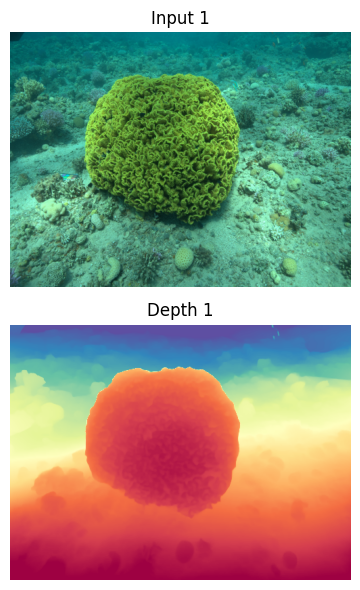

In [54]:
# Visualize input images and depth maps
n_images = len(image_paths)

fig, axes = plt.subplots(2, n_images, figsize=(12, 6))

if n_images == 1:
    axes = axes.reshape(2, 1)

for i in range(n_images):
    # Show original image
    if prediction.processed_images is not None:
        axes[0, i].imshow(prediction.processed_images[i])
    axes[0, i].set_title(f"Input {i+1}")
    axes[0, i].axis('off')
    
    # Show depth map
    depth_vis = visualize_depth(prediction.depth[i], cmap="Spectral")
    axes[1, i].imshow(depth_vis)
    axes[1, i].set_title(f"Depth {i+1}")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [55]:
prediction.depth[0]

array([[9.028569 , 9.026682 , 9.014268 , ..., 8.807393 , 8.776324 ,
        8.859869 ],
       [9.055712 , 8.970443 , 8.966198 , ..., 8.782258 , 8.730996 ,
        8.7186775],
       [9.025329 , 9.026491 , 8.996656 , ..., 8.7402525, 8.705597 ,
        8.788688 ],
       ...,
       [1.7477388, 1.7447327, 1.7501881, ..., 1.8277446, 1.8342036,
        1.837095 ],
       [1.7502922, 1.7499446, 1.7495189, ..., 1.8132348, 1.8244842,
        1.814978 ],
       [1.7660855, 1.7502657, 1.7553176, ..., 1.8229846, 1.8301088,
        1.8075491]], dtype=float32)

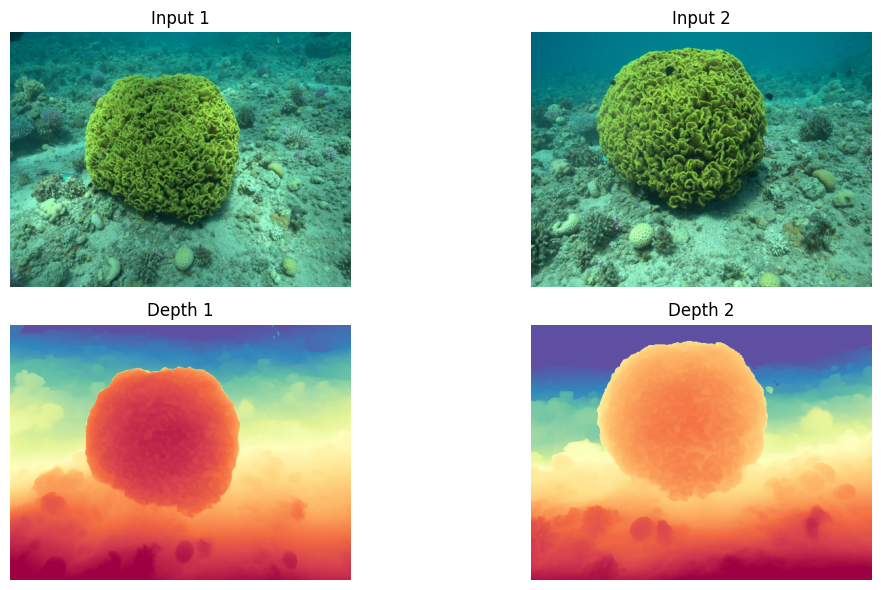

In [41]:
# Visualize input images and depth maps
n_images = len(image_paths)

fig, axes = plt.subplots(2, n_images, figsize=(12, 6))

if n_images == 1:
    axes = axes.reshape(2, 1)

for i in range(n_images):
    # Show original image
    if prediction.processed_images is not None:
        axes[0, i].imshow(prediction.processed_images[i])
    axes[0, i].set_title(f"Input {i+1}")
    axes[0, i].axis('off')
    
    # Show depth map
    depth_vis = visualize_depth(prediction.depth[i], cmap="Spectral")
    axes[1, i].imshow(depth_vis)
    axes[1, i].set_title(f"Depth {i+1}")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [42]:
prediction.depth[0]

array([[6.5337296, 6.521826 , 6.5046177, ..., 6.9094   , 6.8948216,
        6.9949546],
       [6.4812503, 6.4917626, 6.483255 , ..., 6.8962407, 6.851501 ,
        6.8474197],
       [6.496182 , 6.507972 , 6.4789953, ..., 6.8648305, 6.8418636,
        6.9181023],
       ...,
       [1.5897502, 1.5849842, 1.5894561, ..., 1.781082 , 1.7835674,
        1.7843908],
       [1.5891819, 1.5889035, 1.5880214, ..., 1.766197 , 1.7727306,
        1.7611884],
       [1.5911043, 1.5883931, 1.5922428, ..., 1.7689246, 1.768653 ,
        1.7479053]], dtype=float32)

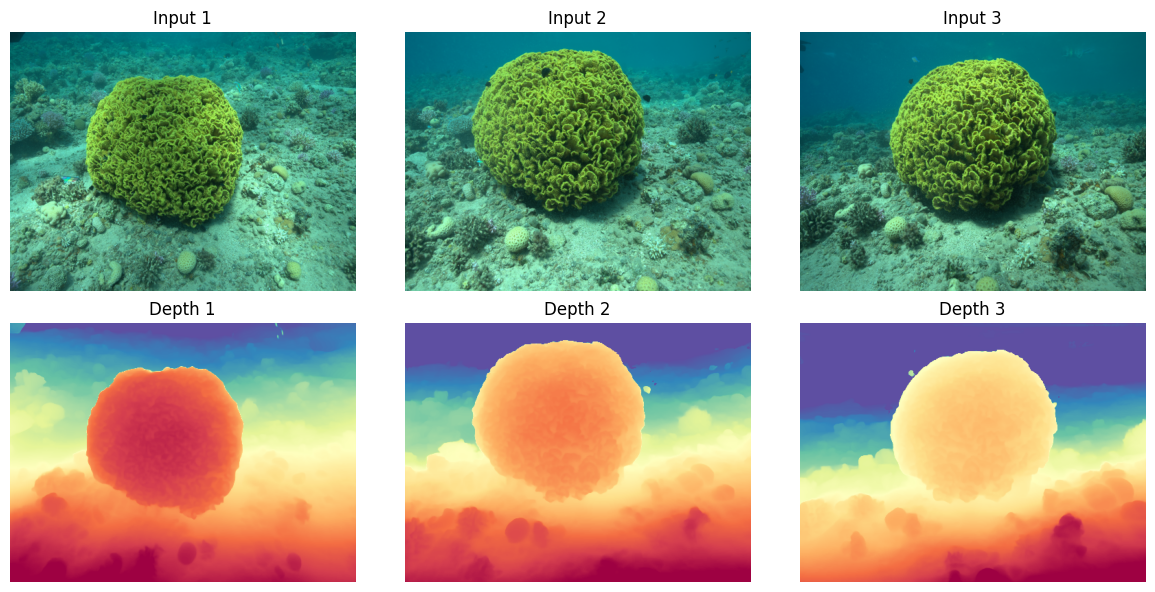

In [48]:
# Visualize input images and depth maps
n_images = len(image_paths)

fig, axes = plt.subplots(2, n_images, figsize=(12, 6))

if n_images == 1:
    axes = axes.reshape(2, 1)

for i in range(n_images):
    # Show original image
    if prediction.processed_images is not None:
        axes[0, i].imshow(prediction.processed_images[i])
    axes[0, i].set_title(f"Input {i+1}")
    axes[0, i].axis('off')
    
    # Show depth map
    depth_vis = visualize_depth(prediction.depth[i], cmap="Spectral")
    axes[1, i].imshow(depth_vis)
    axes[1, i].set_title(f"Depth {i+1}")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [49]:
prediction.depth[0]

array([[5.543702 , 5.6924796, 5.4641705, ..., 6.800384 , 6.7995715,
        6.9271746],
       [5.432887 , 5.6634145, 5.631464 , ..., 6.785542 , 6.7571507,
        6.7518916],
       [5.513211 , 5.6700816, 5.6211066, ..., 6.748351 , 6.7396584,
        6.8380976],
       ...,
       [1.6893954, 1.68557  , 1.690801 , ..., 1.8768123, 1.8779843,
        1.8761705],
       [1.6875893, 1.6897686, 1.6901715, ..., 1.8606259, 1.8657392,
        1.8489381],
       [1.7030884, 1.6903584, 1.6947899, ..., 1.8613179, 1.8572551,
        1.8308027]], dtype=float32)

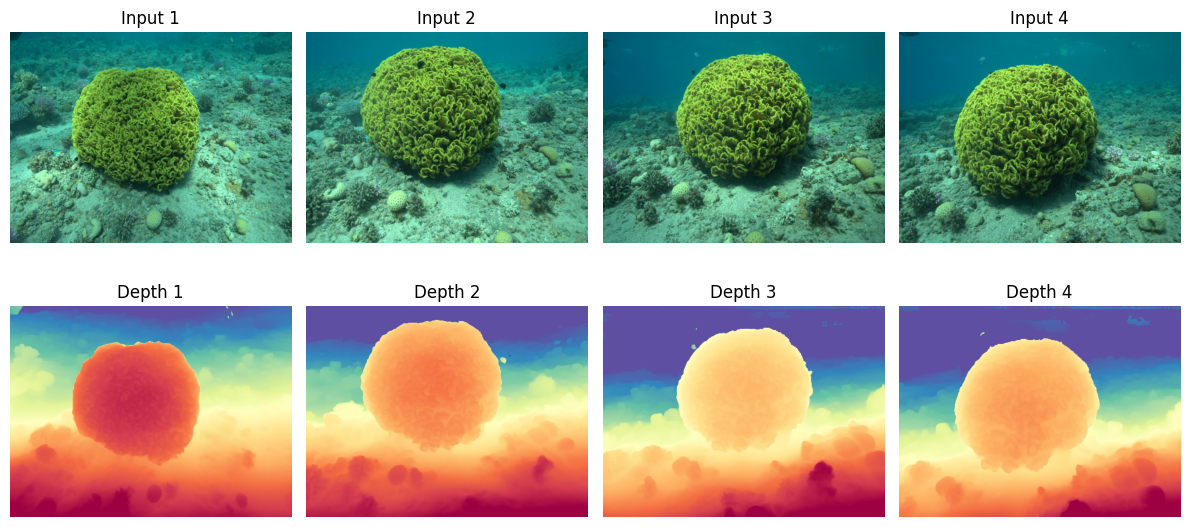

In [51]:
# Visualize input images and depth maps
n_images = len(image_paths)

fig, axes = plt.subplots(2, n_images, figsize=(12, 6))

if n_images == 1:
    axes = axes.reshape(2, 1)

for i in range(n_images):
    # Show original image
    if prediction.processed_images is not None:
        axes[0, i].imshow(prediction.processed_images[i])
    axes[0, i].set_title(f"Input {i+1}")
    axes[0, i].axis('off')
    
    # Show depth map
    depth_vis = visualize_depth(prediction.depth[i], cmap="Spectral")
    axes[1, i].imshow(depth_vis)
    axes[1, i].set_title(f"Depth {i+1}")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [52]:
prediction.depth[0]

array([[4.6803203, 4.7704906, 4.601755 , ..., 6.952003 , 6.957293 ,
        7.087185 ],
       [4.677295 , 4.7766337, 4.781027 , ..., 6.937778 , 6.9150133,
        6.910035 ],
       [4.749713 , 4.804949 , 4.777848 , ..., 6.904685 , 6.896596 ,
        7.0041595],
       ...,
       [1.6746317, 1.6704996, 1.676861 , ..., 1.8459598, 1.847257 ,
        1.8477029],
       [1.6730679, 1.6750212, 1.6754328, ..., 1.8306446, 1.8357419,
        1.8210982],
       [1.6788778, 1.6758683, 1.681207 , ..., 1.8306841, 1.8173242,
        1.8038887]], dtype=float32)